In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [83]:
img = cv2.imread('/home/ningxinLin/davis2018/data/DAVIS/JPEGImages/480p/paragliding/00001.jpg')
mask = cv2.imread('/home/ningxinLin/davis2018/data/DAVIS/Annotations/480p/paragliding/00001.png',0)

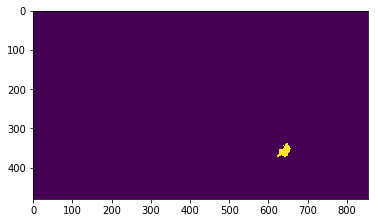

In [15]:
plt.imshow(mask==38)

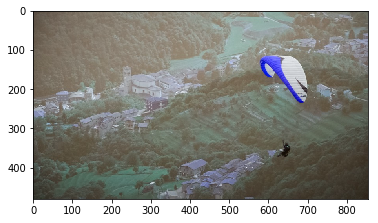

In [38]:
plt.imshow(img)

In [123]:
np.unique(mask)

array([ 0, 38, 75], dtype=uint8)

In [20]:
peoplemask = (mask==38).astype(np.uint8)

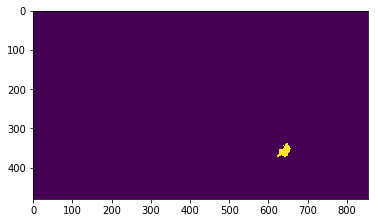

In [21]:
plt.imshow(peoplemask)

In [22]:
np.unique(peoplemask)

array([0, 1], dtype=uint8)

In [34]:
_,contours,hierarchy = cv2.findContours(peoplemask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [121]:
def get_crop_img(img_mask, img_org):
    #gray = cv2.cvtColor(img_mask, cv2.COLOR_BGR2GRAY)    
    #ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)    
    # Find Contour    
    #_, contours, hierarchy = cv2.findContours( thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    _, contours, hierarchy = cv2.findContours(peoplemask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) 
    x1_min=0
    y1_min=0
    x2_max=0
    y2_max=0
    j=0
    for i in range(len(contours)):  
        cnt = contours[i]
        area = cv2.contourArea(cnt)
        #if area < 90000:
            #continue
        j = j+1
        x,y,w,h = cv2.boundingRect(cnt)
        if j==1:
            x1_min, y1_min, x2_max, y2_max = x,y,x+w,y+h
        if x < x1_min:
            x1_min = x
        if y < y1_min:
            y1_min = y
        if x+w > x2_max:
            x2_max = x+w
        if y+h > y2_max:
            y2_max = y+h
    print(x1_min,x2_max,y1_min,y2_max)
    img_crop = cv2.rectangle(img_org.copy(),(621,338),(657,373), (0,255,0),2)
    return img_crop

In [119]:
img_crop = get_crop_img(mask, img)

621 657 338 373


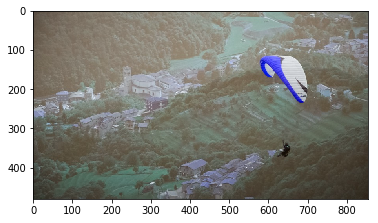

In [120]:
plt.imshow(img_crop)

In [44]:
img_crop

array([], shape=(0, 0, 3), dtype=uint8)

TypeError: Image data cannot be converted to float

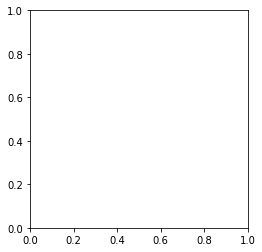

In [32]:
plt.imshow(rect)

In [131]:
f=open('/home/ningxinLin/davis2018/data/DAVIS/ImageSets/2017/train.txt','r')

In [132]:
lines = f.readlines()
for line in lines:
    line = line.strip()
    print(line)

bear
bmx-bumps
boat
boxing-fisheye
breakdance-flare
bus
car-turn
cat-girl
classic-car
color-run
crossing
dance-jump
dancing
disc-jockey
dog-agility
dog-gooses
dogs-scale
drift-turn
drone
elephant
flamingo
hike
hockey
horsejump-low
kid-football
kite-walk
koala
lady-running
lindy-hop
longboard
lucia
mallard-fly
mallard-water
miami-surf
motocross-bumps
motorbike
night-race
paragliding
planes-water
rallye
rhino
rollerblade
schoolgirls
scooter-board
scooter-gray
sheep
skate-park
snowboard
soccerball
stroller
stunt
surf
swing
tennis
tractor-sand
train
tuk-tuk
upside-down
varanus-cage
walking


In [133]:
f = open('/home/ningxinLin/DeepGrabCut_Davis_finetune/data/Davis2017/train/train.txt','r')

In [134]:
lines = f.readlines()

In [135]:
imagepath, maskpath = lines[0].strip().split(' ')

In [136]:
maskpath

'/home/ningxinLin/DeepGrabCut_Davis_finetune/data/Davis2017/train/mask/bear/00064_0.png'

In [140]:
mask = cv2.imread(maskpath,0).astype(np.float32)

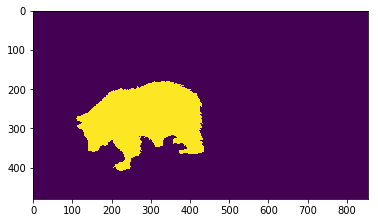

In [141]:
plt.imshow(mask)

In [142]:
np.unique(mask)

array([0., 1.], dtype=float32)

In [144]:
_void_pixels = (mask == 255)

In [145]:
mask[_void_pixels] = 0

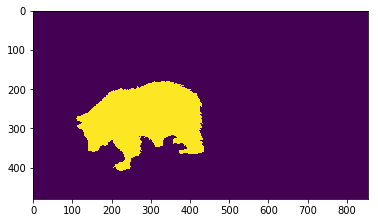

In [146]:
plt.imshow(mask)